The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [60]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Start coding here!

In [61]:
sns.set_style('darkgrid')

In [62]:
nobel_prize = pd.read_csv('data/nobel.csv')
nobel_prize.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


**QUESTION 1:** <br>
What is the most commonly awarded gender and birth country?

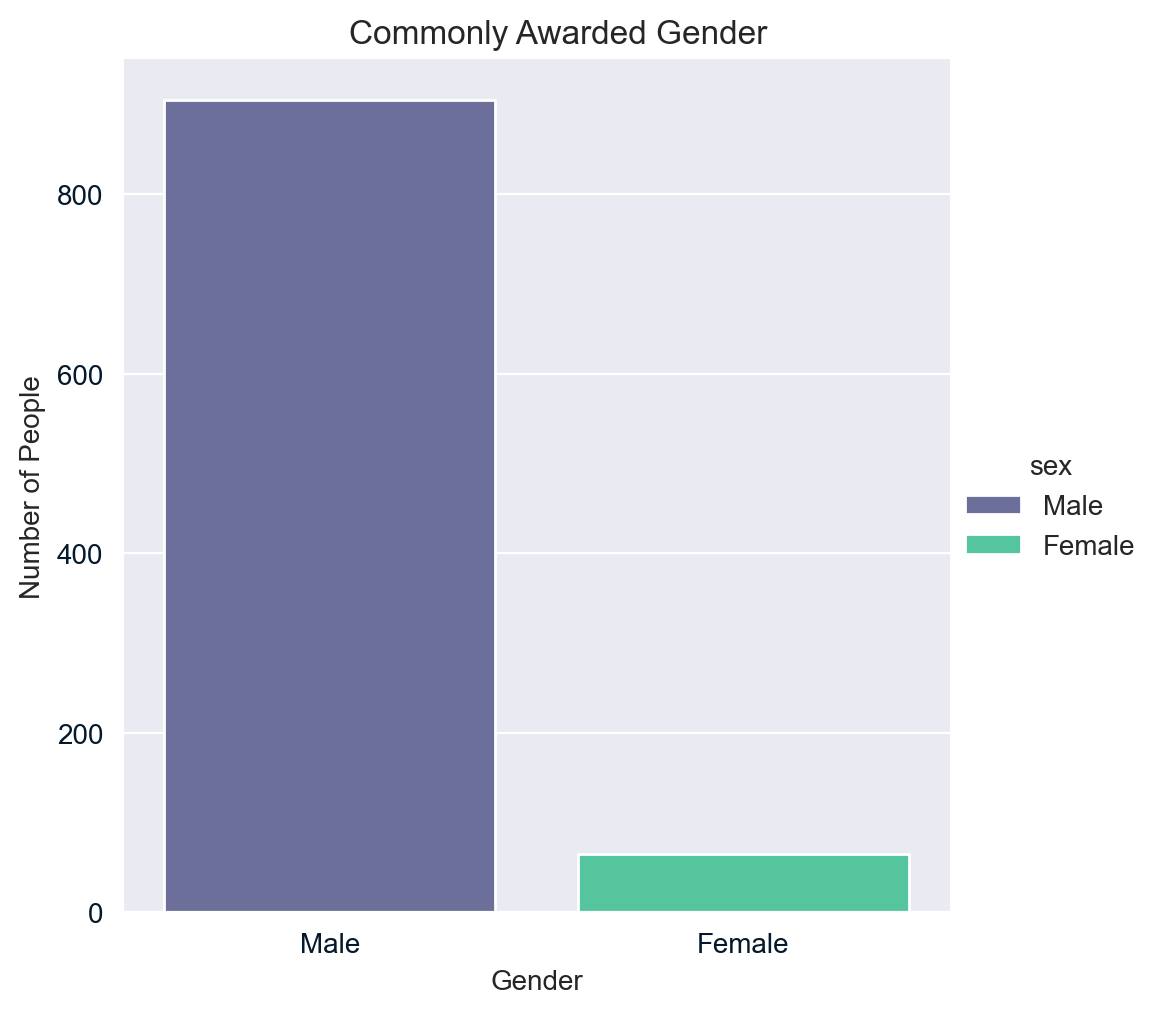

In [63]:
g = sns.catplot(
    kind='count',
    data=nobel_prize,
    x='sex',
    hue='sex'
)
g.fig.suptitle(
    'Commonly Awarded Gender',
    y=1.01
)
g.set(
    xlabel='Gender',
    ylabel='Number of People'
)
plt.show()


In [64]:
# number of countries to recieve the prestiguos award
nobel_prize['birth_country'].nunique()

129

In [65]:
# a look at the top 5 countries
nobel_prize['birth_country'].value_counts(ascending=False)[:5]

United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Name: birth_country, dtype: int64

In [66]:
# Answers to Q1:
top_gender = "Male"
top_country = "United States of America"

**QUESTION 2:** <br>
Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [67]:
us_born = nobel_prize.copy()

# tagging the winners born in USA
us_born['US born'] = us_born['birth_country'] == 'United States of America'

# creating the decade column using the year column
us_born['decade'] = us_born['year']//10 * 10

# ratio of US-born nobel prize winners per decade
max_ratios_us = us_born.groupby('decade', as_index=False)['US born'].mean()#.sort_values('US born', ascending=False)
max_ratios_us

,decade,US born
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


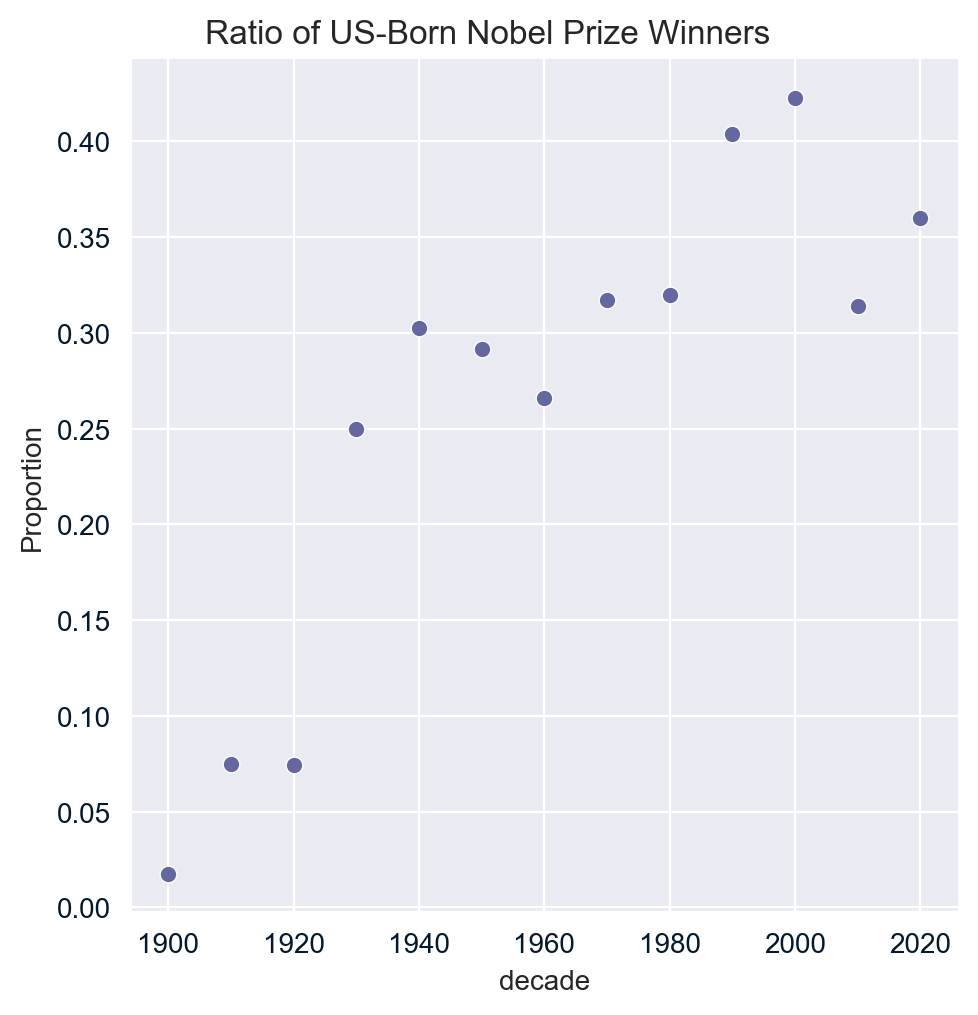

In [68]:
g = sns.relplot(
    kind='scatter',
    data=max_ratios_us,
    x='decade',
    y='US born'
)
g.fig.suptitle(
    'Ratio of US-Born Nobel Prize Winners',
    y=1.01
)
g.set(
    ylabel='Proportion'
)
plt.show()

In [69]:
# Answer to Q2:
max_decade_usa = 2000

**QUESTION 3** <br>
Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [70]:
female_winners = us_born.copy().drop('US born', axis=1)

# tagging all female winners
female_winners['female'] = female_winners['sex'] == 'Female'

# ratio of female laureates for each category per decade
female_nobel_prize_ratio = female_winners.groupby(['decade', 'category'], as_index=False)['female'].mean()

# index of the max ratio for each category per decade
max_vals = female_nobel_prize_ratio.groupby('decade')['female'].idxmax() 

# subsetting the max ratio for each category per decade
max_ratios_female = female_nobel_prize_ratio.iloc[max_vals]

# a dictionary of the highest proportion of female laureates for each category per decade
max_female_dict = dict(zip(max_ratios_female['decade'], max_ratios_female['category']))

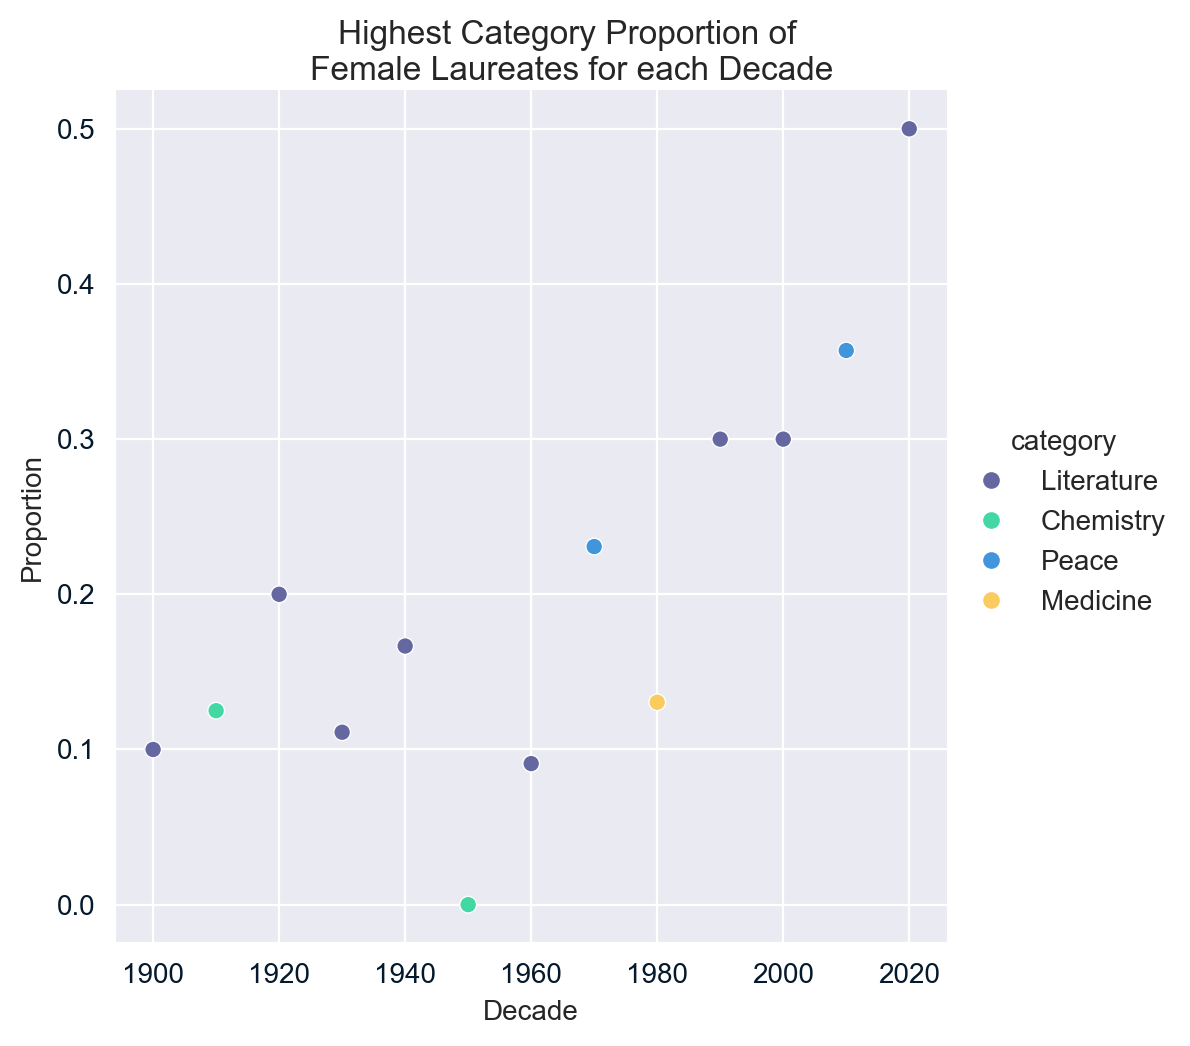

In [71]:
g = sns.relplot(
    kind='scatter',
    data=max_ratios_female,
    x='decade',
    y='female',
    hue='category'
)
g.fig.suptitle(
    'Highest Category Proportion of \nFemale Laureates for each Decade',
    y=1.04
)
g.set(
    xlabel='Decade',
    ylabel='Proportion'
)
plt.show()

In [72]:
# Answer to Q3:
max_female_dict

{1900: 'Literature',
 1910: 'Chemistry',
 1920: 'Literature',
 1930: 'Literature',
 1940: 'Literature',
 1950: 'Chemistry',
 1960: 'Literature',
 1970: 'Peace',
 1980: 'Medicine',
 1990: 'Literature',
 2000: 'Literature',
 2010: 'Peace',
 2020: 'Literature'}

**QUESTION 4:** <br>
Who was the first woman to receive a Nobel Prize, and in what category?

In [73]:
# filtering out only female winners and sorting by year
only_female_laureates = female_winners[female_winners['female'] == True][['year', 'category', 'full_name']].sort_values('year', ascending=True)

# first woman to receive the award
first_woman = only_female_laureates.head(1)
first_woman

,year,category,full_name
19,1903,Physics,"Marie Curie, née Sklodowska"


In [74]:
# Answer to Q4:
first_woman_name = 'Marie Curie, née Sklodowska'
first_woman_category = 'Physics'

**QUESTION 5:** <br>
Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [75]:
# exploring the number of times an individual or organization won the award
repeats = nobel_prize.groupby('laureate_type', as_index=False)['full_name'].value_counts()

# filtering awards won multiple times
repeats = repeats[repeats['count'] > 1].sort_values(['count', 'full_name'], ascending=False)

# taking a look at the name of the individual or organization
repeat_names = repeats['full_name']
repeat_names

962    Comité international de la Croix Rouge (Intern...
963    Office of the United Nations High Commissioner...
2                            Marie Curie, née Sklodowska
0                                     Linus Carl Pauling
3                                           John Bardeen
1                                       Frederick Sanger
Name: full_name, dtype: object

In [76]:
# Answer to Q5:
repeat_list = list(repeat_names)